# 5 图像插值

图像的质量与采样点的数量、灰度精确度（有效数字）与有关.

插值 / 内插值 (interpolation) 是用采样点的值估计未采样的点的值. 在图片缩放 (resize) 时需要用到.

## 最近邻插值

假设采样点是 $(x,y)\in\mathbb N$, 则每个点 $(x,y)\in\mathbb R_+$ 的值可以用最近的采样点的值替代, 即最近邻插值 (nearest neighborhood interpolation, NN).

## 线性插值

对于凸多边形网格可以用线性插值 (linear interpolation), 即用重心坐标的方法确定权重.

例如若四个采样点是 $(0,0),(0,1),(1,0),(1,1)$, 则对于点 $(x,y)\in [0,1]\times [0,1]$ 其值可以认为是
$$f(x,y) = (1-x)(1-y)f(0,0)+(1-x)yf(0,1)+(1-y)xf(1,0)+xyf(1,1)$$

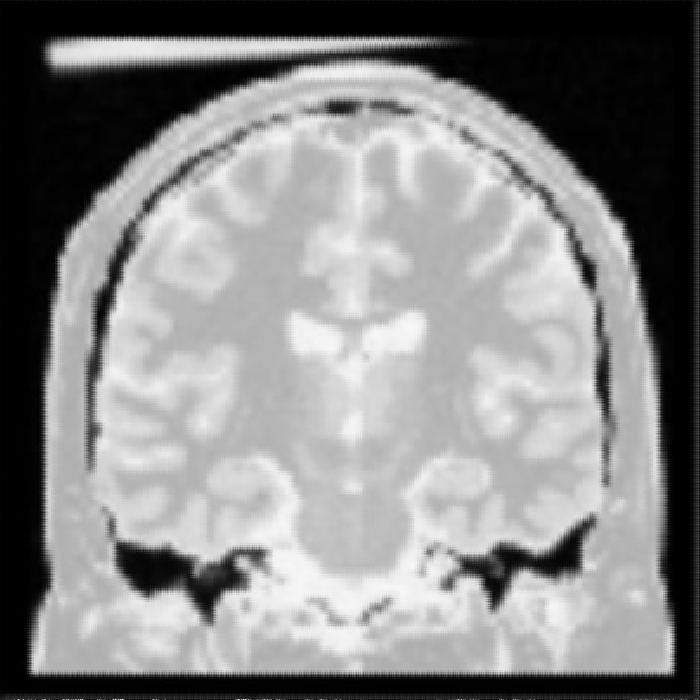

In [27]:
import numpy as np
def ResizeLinearInterpolation(img: np.ndarray, size: tuple):
    """Resize an ndarray grayscale img to given size (width, height)"""
    w, h = size
    new_img = np.zeros((h,w), dtype='uint8')

    def Update(img, new_img, h, w):
        """Resize img to (h, w), overwrite on new_img"""
        x, y, h0, w0 = 0, 0, img.shape[0], img.shape[1]
        dx, dy = h0/h, w0/w 
        for i in range(h):
            x, y = x + dx, 0
            for j in range(w):
                y += dy
                u, v = int(x), int(y)
                u1, v1 = min(h0-1, u+1), min(w0-1, v+1)
                r, s = x - u, y - v
                t = r*s # avoid repeated multiplications
                w1, w2, w3, w4 = s-t, t, 1-r-s+t, r-t
                new_img[i,j] = round(w1*img[u,v] + w2*img[u,v1] + w3*img[u1,v] + w4*img[u1,v1])

    try:
        from numba import njit
        Update = njit(Update, cache=True)
    except:
        pass
    Update(img, new_img, h, w)
    return new_img

from matplotlib import pyplot as plt 
from PIL import Image 
import os
img = np.array(Image.open(os.path.join(os.getcwd(), 'pics\\brain.png')).convert('L'))
Image.fromarray(ResizeLinearInterpolation(img, (700, 700)))

## 三次多项式插值

三次多项式插值 (cubic polynomial interpolation) 相比线性插值使用了一个像素点周围 $4\times 4$ 的采样点.

## 超分

即超分辨率技术 (super-resolution) 用更复杂效果更好的方法放大图像.